<a href="https://colab.research.google.com/github/ssenkaayi/BIT2207-Assignment1/blob/master/titanic_diserster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROCESSING, CLEANING AND TIDING TITANIC DESERSTER DATASET**

according to our problem statement, the goal is to develop a model that can predict survivors basing on the titanic deserster dataset.


In [25]:
# we are going to use pandas and numpy to process and load data.
# so as to perform a quick exploretory analysis on our dataset
# seaborn and matplot-lib is for visualization.
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
# we are going to assign our dataframe to a variable called
# train_df
# so as to check if our dataset is Tidy and clean
train_df = pd.read_csv('train.csv')

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# we performing a quick exploretory analysis
# to have an over of the kind of data that we are going to deal with
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# checking if we having the correct number of rows and columns in our data set
train_df.shape

(891, 12)

In [30]:
# checking if the columns in our data set are having the right naming
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
# since our dataset is tidy, we are going to focus on cleaning our data

# by filling missing values, correcting column names, removing duplicates and outliers.

In [32]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

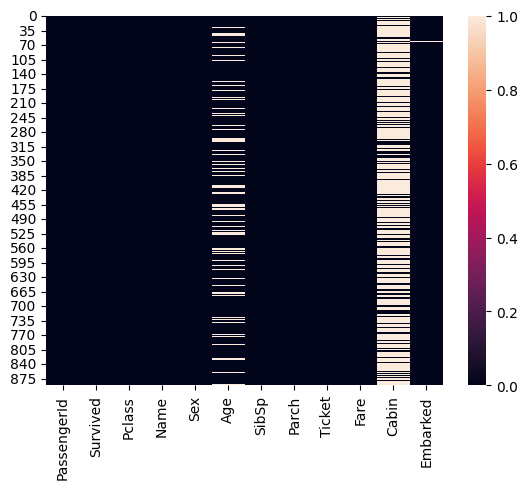

In [33]:
# we use seaborn to visualize feartures with missing values.
# according to our heatmap, it shows that more than 30% of our data in the cabin
# feature is missing.
sns.heatmap(train_df.isna())

In [34]:
# checking for duplicates in our dataset
# and shows that we have no duplicates in our dataset
train_df.duplicated().sum()

0

the next step we are going to focus on cleaning our dataset


**DATA CLEANING**

In [35]:
# we are going to use two methods when removing missing values in our dataset
# droping a column if 30% of its data is missing and perfom imputation on
# the rest.
# we shall use mean and mean mark for numerical features with missing values
# and mode for categorical features with missing values.

In [43]:
train_df.drop(columns = ['Cabin'],inplace=True)

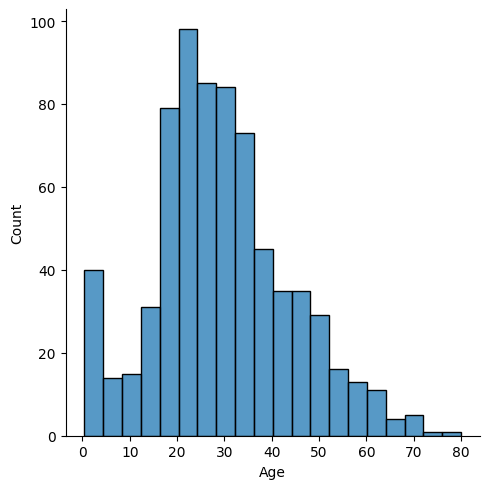

In [37]:
# since my age feature consists of numerical data
# it is important to check the distribution of the data
# and since our data follows  a normal distribution, we are going to use
# the median mark to fill up the miss data
sns.displot(train_df['Age'])

In [38]:
train_df['Age'].median()

28.0

In [39]:
# filling up the rows of age feature with missing data
# with the median mark
train_df.Age.fillna(train_df.Age.median(),inplace=True)

In [40]:
train_df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [41]:
# filling up the rows of Embarked  feature with missing data
# with the mode mark
train_df.Embarked.fillna(train_df.Embarked.mode()[0],inplace=True)

In [44]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

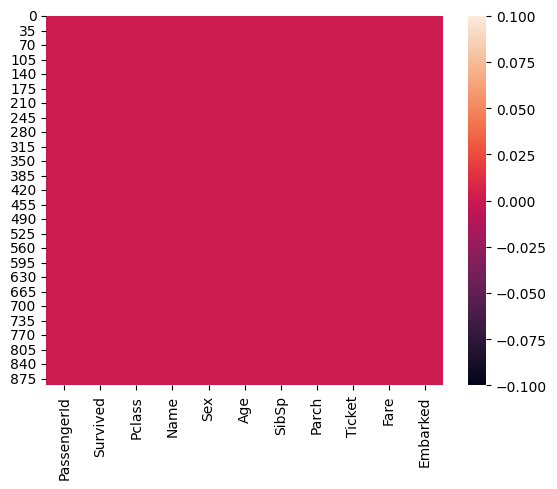

In [46]:
# comfirming that my data has no missing values
sns.heatmap(train_df.isna())

In [47]:
# after cleaning and tidying up my data
# we going to perform some data analysis on our data.

**DATA ANALYSIS**

from our problem statement, our hypthesis states that all the women survived and all the men died

In [48]:
# we are going perform a hypothesis test to test how true
# is our hypothesis.

In [59]:
survived =len( train_df[train_df['Survived']==1])
women = len(train_df[train_df['Sex']=='female'])
survived_women = len(train_df[(train_df['Sex']=='female')
                              &(train_df['Survived']==1)])

In [62]:
print('females = ',women)
print('suvived_females = ',survived_women)
print('survived = ',survived)

females =  314
suvived_females =  233
survived =  342


In [64]:
# from my hypothesis test, it ti true that women survived more than men
# since @ > 0.5
print(survived_women/survived)

0.6812865497076024
